# Import Libraries

In [295]:
import pandas as pd
import random
# Necessary imports

import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, Layout
import locale
import warnings
import seaborn as sns
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

# For number formatting 
locale.setlocale(locale.LC_ALL, '') 

# Style of plots
matplotlib.style.use('seaborn')

from faker import Faker
fake = Faker()

In [296]:
df = pd.read_csv('OriginalDataset.csv')

In [297]:
df = df.drop(['Kidhome', 'Teenhome', 'Marital_Status', 'Z_Revenue', 'Z_CostContact', 'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'], axis=1)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [298]:
df = df.rename({'ID' : 'Customer_ID', 
                'Dt_Customer' : 'Date_Enrolled', 'Recency': 'Days_Since_Last_Cohort',
                'MntWines' : 'Amount_Spent_On_Courses', 'MntFruits' : 'Amount_Spent_on_Books',
                'MntMeatProducts' : 'Minutes_Spent_on_Headstarter', 'MntFishProducts' : 'Questions_Completed',
                'MntSweetProducts' : 'Videos_Watched', 'MntGoldProds' : 'Minutes_Spent_Coding',
                'NumCatalogPurchases' : 'Num_Courses_Purchased', 'NumStorePurchases' : 'Number_of_Students_Referred',
                'NumWebVisitsMonth' : 'Site_Visits_Per_Month', 'NumWebPurchases' : 'Email_Opens'}, axis=1)

In [299]:
df['Education'] = df['Education'].replace({'Basic': 'In-College', 'Graduation': 'Bachelors', '2n Cycle' : 'High School', 'Master' : 'Masters'})

In [300]:
df['Average_Teammate_Rating'] = [round(random.uniform(4, 10), 2) for _ in range(df.shape[0])]
df['Cohorts_Participated_In'] = [int(random.uniform(1, 5)) for _ in range(df.shape[0])]
df['Highest_Leaderboard_Rank'] = [int(np.random.normal(50, 15)) for _ in range(df.shape[0])]
df['Headstarter_Rating'] = [int(random.uniform(5, 10)) for _ in range(df.shape[0])]
df['First_Name'] = [fake.first_name() for _ in range(df.shape[0])]
df['Last_Name'] = [fake.last_name() for _ in range(df.shape[0])]

df['Site_Visits_Per_Month'] = df['Site_Visits_Per_Month'].apply(lambda x : x*2)

In [301]:
df.loc[df['Education'] == 'PhD', 'Income'] = df[df['Education'] == 'PhD']['Income'] * 2
df.loc[df['Education'] == 'In-College', 'Income'] = df[df['Education'] == 'In-College']['Income'] * 1.3
df.loc[df['Education'] == 'Masters', 'Income'] = df[df['Education'] == 'Masters']['Income'] * 1.8
df.loc[df['Education'] == 'Bachelors', 'Income'] = df[df['Education'] == 'Bachelors']['Income'] * 1.6
df.loc[df['Education'] == 'High School', 'Income'] = df[df['Education'] == 'High School']['Income'] * 0.2


df.loc[df['Education'] == 'In-College', 'Amount_Spent_On_Courses'] = df[df['Education'] == 'In-College']['Amount_Spent_On_Courses'] * 30

In [302]:
df = df[(df['Income'] < 300000) & (df['Income'] > 0)]

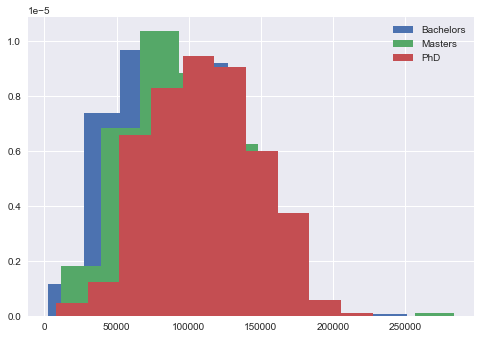

In [303]:
plt.figure()
plt.hist(df[df['Education'] == 'Bachelors']['Income'], bins=10, density=True, label='Bachelors')
plt.hist(df[df['Education'] == 'Masters']['Income'], bins=10,  density=True, label='Masters')
plt.hist(df[df['Education'] == 'PhD']['Income'], bins=10, density=True, label='PhD')
#plt.hist(df[df['Education'] == 'In-College']['Income'], bins=10, stacked=True, density=True)
plt.legend()
plt.show()

In [304]:
def bar_plot(metric):
    df_sorted = df.sort_values(by=metric, ascending=False)
    fig = sns.barplot(x='Education', y=metric, data=df, estimator=np.median)



interact(bar_plot, metric=list(df.columns))

interactive(children=(Dropdown(description='metric', options=('Customer_ID', 'Year_Birth', 'Education', 'Incom…

<function __main__.bar_plot(metric)>

In [305]:
df = df[['Customer_ID', 'First_Name', 'Last_Name', 'Year_Birth', 'Education', 'Income', 'Date_Enrolled',
       'Days_Since_Last_Cohort', 'Amount_Spent_On_Courses',
       'Amount_Spent_on_Books', 'Minutes_Spent_on_Headstarter',
       'Questions_Completed', 'Videos_Watched', 'Minutes_Spent_Coding',
       'Email_Opens', 'Num_Courses_Purchased', 'Number_of_Students_Referred',
       'Site_Visits_Per_Month', 'Average_Teammate_Rating',
       'Cohorts_Participated_In', 'Highest_Leaderboard_Rank', 'Complain', 'Headstarter_Rating']]

In [306]:
# def apply_random_skew(df_):
    
#     new_df = df_.copy(deep=True)
    
#     cols = ['Days_Since_Last_Cohort', 'Amount_Spent_On_Courses',
#             'Amount_Spent_on_Books', 'Minutes_Spent_on_Headstarter',
#             'Questions_Completed', 'Videos_Watched', 'Minutes_Spent_Coding',
#             'Email_Opens', 'Num_Courses_Purchased', 'Number_of_Students_Referred',
#             'Site_Visits_Per_Month']
    
#     for col in cols:
#         new_df.loc[df['Education'] == 'PhD', col] = round(df[df['Education'] == 'PhD'][col] * (random.uniform(0.5, 6)), 0)
#         new_df.loc[df['Education'] == 'In-College', col] = round(df[df['Education'] == 'In-College'][col] * (random.uniform(0.5, 6)), 0)
#         new_df.loc[df['Education'] == 'Masters', col] = round(df[df['Education'] == 'Masters'][col] * (random.uniform(0.5, 6)), 0)
#         new_df.loc[df['Education'] == 'Bachelors', col] = round(df[df['Education'] == 'Bachelors'][col] * (random.uniform(0.5, 6)), 0)
#         new_df.loc[df['Education'] == 'High School', col] = round(df[df['Education'] == 'High School'][col] * (random.uniform(0.5, 6)), 0)
                                                                                                         
#     return new_df                                                                                                     

In [307]:
#new_df = apply_random_skew(df)

In [308]:
#new_df

# Highest Leaderboard Rank Calculation

In [310]:
cols = ['Amount_Spent_On_Courses',
            'Amount_Spent_on_Books', 'Minutes_Spent_on_Headstarter',
            'Questions_Completed', 'Videos_Watched', 'Minutes_Spent_Coding',
            'Email_Opens', 'Num_Courses_Purchased', 'Number_of_Students_Referred',
            'Site_Visits_Per_Month', 'Average_Teammate_Rating',
            'Cohorts_Participated_In']

col_dict = {'Amount_Spent_On_Courses' : 20, 
            'Amount_Spent_on_Books' : 20,
            'Minutes_Spent_on_Headstarter' : 100,
            'Questions_Completed' : 70,
            'Videos_Watched' : 70,
            'Minutes_Spent_Coding' : 70,
            'Email_Opens': 2,
            'Num_Courses_Purchased' : 20, 
            'Number_of_Students_Referred' : 10,
            'Site_Visits_Per_Month' : 50,
            'Average_Teammate_Rating' : 40,
            'Cohorts_Participated_In' : 45}

In [311]:
ranks = []

for row in df.iterrows():
    
    summ = 0
    
    for key in col_dict:
        summ += (1 + row[1][key]) * col_dict[key]
    
    ranks.append(summ)

In [312]:
min_rank = min(ranks)
max_rank = max(ranks)

In [313]:
cleaned_ranks = []
for r in ranks:
    x = interp1d([min_rank, max_rank], [3,300])
    cleaned_ranks.append(300 - round(float(x(r)), 0))

In [314]:
df['Highest_Leaderboard_Rank'] = cleaned_ranks

<AxesSubplot:>

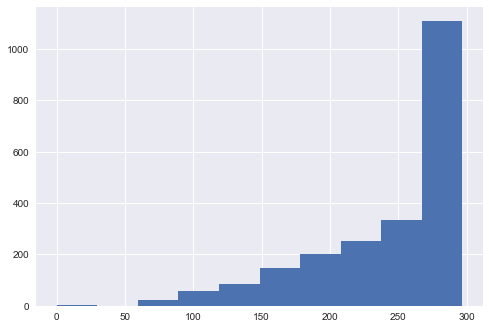

In [315]:
df['Highest_Leaderboard_Rank'].hist()

In [316]:
min_rank, max_rank

(1400.2, 179079.8)

In [317]:
x = interp1d([min_rank, max_rank],[1,300])
float(x(109990))

183.7353854916378

# Probability of Getting Offer Calcuation

In [318]:
prob_offer_dict = {'Amount_Spent_On_Courses' : 40, 
            'Amount_Spent_on_Books' : 40,
            'Minutes_Spent_on_Headstarter' : 150,
            'Questions_Completed' : 100,
            'Videos_Watched' : 80,
            'Minutes_Spent_Coding' : 120,
            'Email_Opens': 5,
            'Num_Courses_Purchased' : 20, 
            'Number_of_Students_Referred' : 20,
            'Site_Visits_Per_Month' : 50,
            'Average_Teammate_Rating' : 70,
            'Cohorts_Participated_In' : 80,
            'Highest_Leaderboard_Rank' : 200}

In [319]:
probs = []

for row in df.iterrows():
    
    summ = 0
    
    for key in col_dict:
        summ += (1 + row[1][key]) * prob_offer_dict[key]
    
    probs.append(summ)

In [320]:
min_rank = min(ranks)
max_rank = max(ranks)
min_rank, max_rank

(1400.2, 179079.8)

In [321]:
cleaned_probs = []
for r in ranks:
    x = interp1d([min_rank, max_rank], [0, 100])
    cleaned_probs.append(round(float(x(r)), 0))

In [322]:
df['Probability_Of_Getting_Offer'] = cleaned_probs

In [323]:
df['Probability_Of_Getting_Offer'] = df['Probability_Of_Getting_Offer'].apply(lambda x : round(x * random.uniform(0.5, 1), 1))
df['Highest_Leaderboard_Rank'] = df['Highest_Leaderboard_Rank'].apply(lambda x : round(x * random.uniform(1, 2), 0))

# Linear Regression Test

In [324]:
cols = ['Amount_Spent_On_Courses',
            'Amount_Spent_on_Books', 'Minutes_Spent_on_Headstarter',
            'Questions_Completed', 'Videos_Watched', 'Minutes_Spent_Coding',
            'Email_Opens', 'Num_Courses_Purchased', 'Number_of_Students_Referred',
            'Site_Visits_Per_Month', 'Average_Teammate_Rating',
            'Cohorts_Participated_In']

In [325]:
x = df[cols]
y = df['Probability_Of_Getting_Offer']
 
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# with sklearn
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [326]:
y_prediction =  regr.predict(x_test)

In [327]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(f'r_sqr value: {regr.score(x, y)}')

score= r2_score(y_test,y_prediction)
print(score)
print(mean_squared_error(y_test,y_prediction))

r_sqr value: 0.9407747708719068
0.9455751685993489
12.304914210829764


# Apply Transformations

In [329]:
df.columns

Index(['Customer_ID', 'First_Name', 'Last_Name', 'Year_Birth', 'Education',
       'Income', 'Date_Enrolled', 'Days_Since_Last_Cohort',
       'Amount_Spent_On_Courses', 'Amount_Spent_on_Books',
       'Minutes_Spent_on_Headstarter', 'Questions_Completed', 'Videos_Watched',
       'Minutes_Spent_Coding', 'Email_Opens', 'Num_Courses_Purchased',
       'Number_of_Students_Referred', 'Site_Visits_Per_Month',
       'Average_Teammate_Rating', 'Cohorts_Participated_In',
       'Highest_Leaderboard_Rank', 'Complain', 'Headstarter_Rating',
       'Probability_Of_Getting_Offer'],
      dtype='object')

<AxesSubplot:>

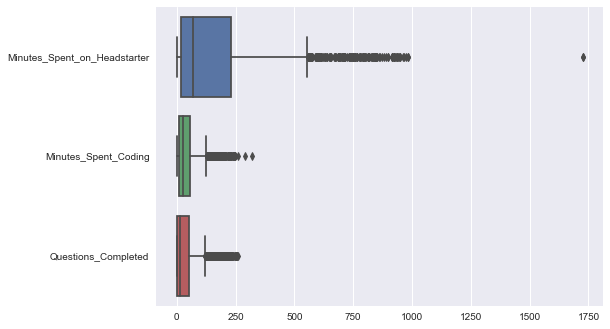

In [330]:
sns.boxplot(data=df[["Minutes_Spent_on_Headstarter", "Minutes_Spent_Coding", 'Questions_Completed']], orient="h")

In [331]:
df['Questions_Completed'] = df['Minutes_Spent_on_Headstarter'] * round(random.uniform(0.8, 3), 0) // 1.5
df['Videos_Watched'] = df['Minutes_Spent_on_Headstarter'] * round(random.uniform(0.4, 0.8), 0) // 8
df['Minutes_Spent_Coding'] = df['Minutes_Spent_on_Headstarter'] * round(random.uniform(0.5, 0.8), 0) // 2

<AxesSubplot:>

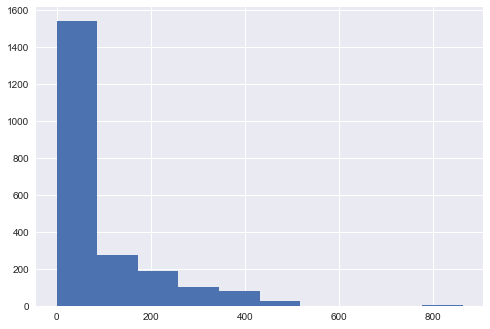

In [332]:
df['Minutes_Spent_Coding'].hist()

In [333]:
df['Minutes_Spent_Coding'].median()

34.0

In [334]:
def apply_transformation(df, category, subset, col, delta):
    
    new_df = df.copy(deep=True)
    
    new_df.loc[df[category] == subset, col] = round(df[df[category] == subset][col] * delta, 0)
    
    return new_df

In [335]:
df = apply_transformation(df, 'Education', 'In-College', 'Minutes_Spent_on_Headstarter', 5)
df = apply_transformation(df, 'Education', 'In-College', 'Videos_Watched', 8)

<AxesSubplot:>

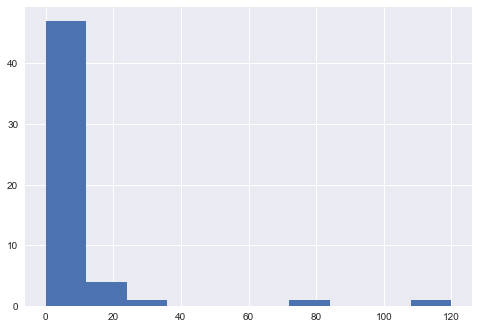

In [336]:
df[df['Education'] == 'In-College']['Videos_Watched'].hist()

In [337]:
def bar_plot(metric):
    df_sorted = df.sort_values(by=metric, ascending=False)
    fig = sns.barplot(x='Education', y=metric, data=df, estimator=np.median)



interact(bar_plot, metric=list(df.columns))

interactive(children=(Dropdown(description='metric', options=('Customer_ID', 'First_Name', 'Last_Name', 'Year_…

<function __main__.bar_plot(metric)>

# Add College Major Column

In [338]:
from numpy.random import choice

In [339]:
majors = ['Computer Science', 'Cyber Security', 'Pre-Med', 'Marketing', 'Finance', 'Law']
probabilities = [0.65, 0.12, 0.08, 0.03, 0.09, 0.03]


In [340]:
random_major_list = choice(majors, df.shape[0], p=probabilities)

In [341]:
df['Major'] = random_major_list

In [342]:
df = df[['Customer_ID', 'First_Name', 'Last_Name', 'Year_Birth', 'Education', 'Major',
       'Income', 'Date_Enrolled', 'Days_Since_Last_Cohort',
       'Amount_Spent_On_Courses', 'Amount_Spent_on_Books',
       'Minutes_Spent_on_Headstarter', 'Questions_Completed', 'Videos_Watched',
       'Minutes_Spent_Coding', 'Email_Opens', 'Num_Courses_Purchased',
       'Number_of_Students_Referred', 'Site_Visits_Per_Month',
       'Average_Teammate_Rating', 'Cohorts_Participated_In',
       'Highest_Leaderboard_Rank', 'Complain', 'Headstarter_Rating',
       'Probability_Of_Getting_Offer']]

In [343]:
df

,Customer_ID,First_Name,Last_Name,Year_Birth,Education,Major,Income,Date_Enrolled,Days_Since_Last_Cohort,Amount_Spent_On_Courses,...,Email_Opens,Num_Courses_Purchased,Number_of_Students_Referred,Site_Visits_Per_Month,Average_Teammate_Rating,Cohorts_Participated_In,Highest_Leaderboard_Rank,Complain,Headstarter_Rating,Probability_Of_Getting_Offer
0,5524,Jason,Sharp,1957,Bachelors,Computer Science,93020.8,2012-04-09,58,635,...,8,10,4,14,4.86,2,226.0,0,5,39.7
1,2174,Cheryl,Medina,1954,Bachelors,Computer Science,74150.4,2014-08-03,38,11,...,1,1,2,10,7.92,3,395.0,0,9,0.8
2,4141,Jennifer,Daniels,1965,Bachelors,Finance,114580.8,2013-08-21,26,426,...,8,2,10,8,8.36,2,448.0,0,8,15.4
3,6182,John,Mills,1984,Bachelors,Computer Science,42633.6,2014-10-02,26,11,...,2,0,4,12,8.95,4,314.0,0,9,1.3
4,5324,Janet,Moore,1981,PhD,Cyber Security,116586.0,2014-01-19,94,173,...,5,3,6,10,5.72,3,264.0,0,7,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Brittany,Estes,1967,Bachelors,Computer Science,97956.8,2013-06-13,46,709,...,9,3,4,10,9.15,4,289.0,0,9,28.5
2236,4001,Ashley,Brown,1946,PhD,Cyber Security,128028.0,2014-10-06,56,406,...,8,2,5,14,5.14,1,457.0,0,6,5.3
2237,7270,Jane,Webster,1981,Bachelors,Computer Science,91169.6,2014-01-25,91,908,...,2,3,13,12,7.27,3,316.0,0,5,22.6
2238,8235,Lisa,Heath,1956,Masters,Finance,124641.0,2014-01-24,8,428,...,6,5,10,6,8.11,3,306.0,0,6,16.4


In [344]:
valid_cols = ['Amount_Spent_On_Courses', 'Amount_Spent_on_Books',
       'Minutes_Spent_on_Headstarter', 'Questions_Completed', 'Videos_Watched',
       'Minutes_Spent_Coding', 'Num_Courses_Purchased', 'Site_Visits_Per_Month']

In [345]:
for col in valid_cols:
    df = apply_transformation(df, 'Major', 'Computer Science', col, random.uniform(1, 2))

In [346]:
for col in valid_cols:
    df = apply_transformation(df, 'Major', 'Cyber Security', col, random.uniform(0.9, 2))

In [347]:
for col in valid_cols:
    df = apply_transformation(df, 'Major', 'Pre-Med', col, random.uniform(0.8, 1.8))

In [348]:
for col in valid_cols:
    df = apply_transformation(df, 'Major', 'Marketing', col, random.uniform(0.5, 1.5))

In [349]:
for col in valid_cols:
    df = apply_transformation(df, 'Major', 'Finance', col, random.uniform(0.4, 1.8))

In [353]:
for col in valid_cols:
    df = apply_transformation(df, 'Major', 'Law', col, random.uniform(0.4, 0.7))

In [354]:
df

,Customer_ID,First_Name,Last_Name,Year_Birth,Education,Major,Income,Date_Enrolled,Days_Since_Last_Cohort,Amount_Spent_On_Courses,...,Email_Opens,Num_Courses_Purchased,Number_of_Students_Referred,Site_Visits_Per_Month,Average_Teammate_Rating,Cohorts_Participated_In,Highest_Leaderboard_Rank,Complain,Headstarter_Rating,Probability_Of_Getting_Offer
0,5524,Jason,Sharp,1957,Bachelors,Computer Science,93020.8,2012-04-09,58,931.0,...,8,11.0,4,18.0,4.86,2,226.0,0,5,39.7
1,2174,Cheryl,Medina,1954,Bachelors,Computer Science,74150.4,2014-08-03,38,16.0,...,1,1.0,2,13.0,7.92,3,395.0,0,9,0.8
2,4141,Jennifer,Daniels,1965,Bachelors,Finance,114580.8,2013-08-21,26,738.0,...,8,2.0,10,8.0,8.36,2,448.0,0,8,15.4
3,6182,John,Mills,1984,Bachelors,Computer Science,42633.6,2014-10-02,26,16.0,...,2,0.0,4,15.0,8.95,4,314.0,0,9,1.3
4,5324,Janet,Moore,1981,PhD,Cyber Security,116586.0,2014-01-19,94,306.0,...,5,5.0,6,15.0,5.72,3,264.0,0,7,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Brittany,Estes,1967,Bachelors,Computer Science,97956.8,2013-06-13,46,1039.0,...,9,3.0,4,13.0,9.15,4,289.0,0,9,28.5
2236,4001,Ashley,Brown,1946,PhD,Cyber Security,128028.0,2014-10-06,56,719.0,...,8,4.0,5,21.0,5.14,1,457.0,0,6,5.3
2237,7270,Jane,Webster,1981,Bachelors,Computer Science,91169.6,2014-01-25,91,1331.0,...,2,3.0,13,15.0,7.27,3,316.0,0,5,22.6
2238,8235,Lisa,Heath,1956,Masters,Finance,124641.0,2014-01-24,8,742.0,...,6,4.0,10,6.0,8.11,3,306.0,0,6,16.4


In [356]:
df.columns

Index(['Customer_ID', 'First_Name', 'Last_Name', 'Year_Birth', 'Education',
       'Major', 'Income', 'Date_Enrolled', 'Days_Since_Last_Cohort',
       'Amount_Spent_On_Courses', 'Amount_Spent_on_Books',
       'Minutes_Spent_on_Headstarter', 'Questions_Completed', 'Videos_Watched',
       'Minutes_Spent_Coding', 'Email_Opens', 'Num_Courses_Purchased',
       'Number_of_Students_Referred', 'Site_Visits_Per_Month',
       'Average_Teammate_Rating', 'Cohorts_Participated_In',
       'Highest_Leaderboard_Rank', 'Complain', 'Headstarter_Rating',
       'Probability_Of_Getting_Offer'],
      dtype='object')

In [355]:
df.to_csv('HackathonDataset.csv')